In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# Join together the additional teams data
teams_df = pd.read_csv("../data/raw_teams.csv")
tmp_teams_ads = pd.read_csv("../data/raw_teams_ads.csv")

In [132]:
# Use a set to find the differences
teams_df_cols = set(teams_df.columns)
tmp_teams_cols = set(tmp_teams_ads.columns)
new_cols = list(tmp_teams_cols - teams_df_cols)

key_cols = ['key_col']

# Add in a unique column
teams_df['key_col'] = teams_df['year'].astype(str) + "_" + teams_df['team_id'] + "_" + teams_df['Week']
tmp_teams_ads['key_col'] = teams_df['year'].astype(str) + "_" + teams_df['team_id'] + "_" + teams_df['Week']

# Join the two together
teams_df = pd.merge(left=teams_df,
                    right=tmp_teams_ads[key_cols + new_cols],
                    how='left',
                    left_on='key_col',
                    right_on='key_col'
                   )

In [133]:
# We'll drop a few different columns at the beginning to clean up our dataset
drop_cols = [0, 1]
teams_df = teams_df.drop(teams_df.columns[drop_cols], axis=1)

In [134]:
# Rename some columns to make them lowercase
col_rename = {
    'Week': 'week',
    'Day': 'day',
    'Date': 'date',
    'Unnamed: 3_level_1': 'time',
    'Rec': 'rec',
    'Away': 'away',
    'Opp': 'opp',
    'Unnamed: 25': 'boxscore_stub',
    'Unnamed: 26': 'boxscore_url'
}

teams_df = teams_df.rename(columns=col_rename)
teams_df.head()

,week,day,date,time,result,OT,rec,away,opp,score_team,...,won_toss_overtime,humidity_pct,surface_type,team_abbr,team_spread,wind_speed,temperature,duration,event_date,won_toss_overtime_decision
0,1,Sun,September 8,1:02PM ET,W,0,1-0,1,Buffalo Bills,23.0,...,NaN,55.0,a_turf,nwe,New England Patriots -10.5,11.0,65.0,193.0,2013-09-08,NaN
1,2,Thu,September 12,8:29PM ET,W,0,2-0,0,New York Jets,13.0,...,NaN,89.0,fieldturf,nwe,New England Patriots -11.5,8.0,72.0,204.0,2013-09-12,NaN
2,3,Sun,September 22,1:02PM ET,W,0,3-0,0,Tampa Bay Buccaneers,23.0,...,NaN,72.0,fieldturf,nwe,New England Patriots -7.5,9.0,65.0,179.0,2013-09-22,NaN
3,4,Sun,September 29,8:30PM ET,W,0,4-0,1,Atlanta Falcons,30.0,...,NaN,NaN,fieldturf,nwe,Atlanta Falcons -3.0,NaN,NaN,201.0,2013-09-29,NaN
4,5,Sun,October 6,1:02PM ET,L,0,4-1,1,Cincinnati Bengals,6.0,...,NaN,93.0,fieldturf,nwe,New England Patriots -1.0,7.0,68.0,176.0,2013-10-06,NaN


<Axes: xlabel='Count', ylabel='week'>

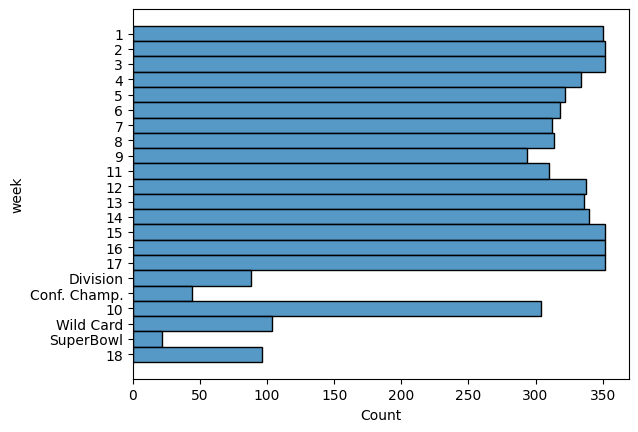

In [135]:
sns.histplot(data=teams_df, y = "week")

In [78]:
teams_df.loc[teams_df['playoffs']==0,].groupby(['year', 'team_id'])['week'].apply(lambda x: max(x), include_groups=False)

year  team_id
2013  atl        9
      buf        9
      car        9
      chi        9
      cin        9
                ..
2023  sdg        9
      sea        9
      sfo        8
      tam        9
      was        9
Name: week, Length: 352, dtype: object

In [136]:
# We'll add a counter in for number of games played in a season
# Because we have the flag 'playoffs', we'll keep the week as numeric

# Keep in mind there is a bye week, so week number doesn't always correspond with number of games played
    
teams_df['season_games_played'] = teams_df.groupby(['team_id', 'year']).cumcount()+1

In [137]:
# temp save
teams_df.to_csv("../data/teams.csv")